## General information
In this notebook we will show you the basic techniques to visualize and analyse nummerical data using Python 3. We will create a mock data-set of a damped harmonic oscillator (a simple pendulum).

Before we start, we need to include some Python packages:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import lmfit
import matplotlib.gridspec as gridspec

np.set_printoptions(precision=4,threshold =9,suppress=True)  #Compact display.


## Example 1: Damped harmonic motion
Here I create a mock-data set of a damped harmonic oscillator. The time data is an array from 0 to 10, with $\delta t$ = 0.2. <br>
The y-data is created by the function: <br>

 * $y(t) = e^{-0.2t}\sin(3t)+0.05t\zeta(t)$.

The harmonic response is given by $\sin(\omega t)$ with $\omega$ = 3 $t^{-1}$, the damping term is included by an exponential decay $e^{\gamma t}$, with $\gamma = 0.2$ $t^{-1}$ the damping term.<br>
The last term, $0.05t\zeta(t)$ account for a stochastic proccess. $\zeta(t)$ is a uniform number (float) from -1 to 1. The exact details of the process are not import.

In [34]:
np.random.seed(2) #initialize random number generator seed.

t = np.arange(0,10,0.2) # x-axis data, an array ('list') from [0,0.2...9.8, 10].
y = np.exp(-0.2*t)*np.sin(3*t) + 0.05*t*np.random.uniform(-1,1,len(t)) # y-axis data.
terr = 0.1 # constant error in time.
yerr = 0.05*y +0.1 # The error in y.

#### plotting the data
In the next lines of code I will plot the data. 
Our data is 2 dimensional (y,t) and contains errors, so we will need an errorbar plot. 

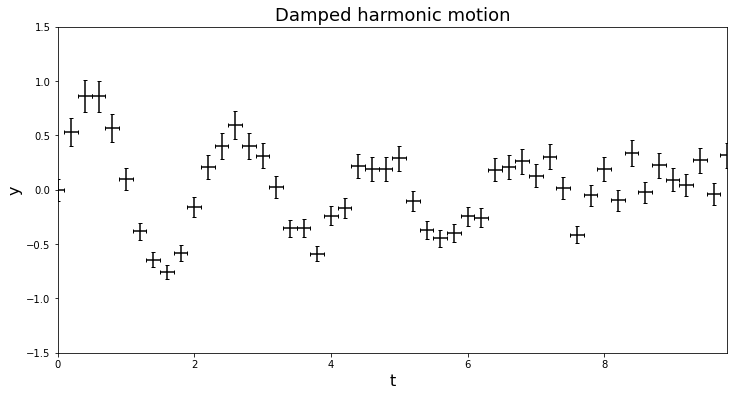

In [38]:
fig, axes = plt.subplots(1,1,figsize=(12,6)) #Creates a single figure with dimensions (12 by 6 (inch))
axes.set_title('Damped harmonic motion', fontsize=18)
axes.errorbar(t,y,xerr=terr,yerr=yerr,fmt='none',ecolor='black',capsize=2) #fmt, ecolor and capsize can be personalized.
axes.set_xlabel('t',fontsize=16)
axes.set_ylabel('y',fontsize=16)
axes.set_xlim(np.min(t),np.max(t))
axes.set_ylim(-1.5,1.5)
plt.show()

### Fit data with model

p1 =  0.20071 +- 0.01228
p2 =  2.99571 +- 0.01265


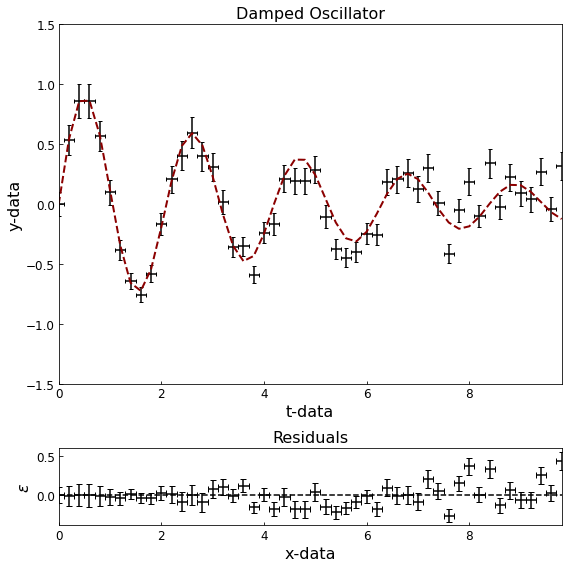

p1 =  0.17724 +- 0.00838
p2 =  2.99874 +- 0.01003


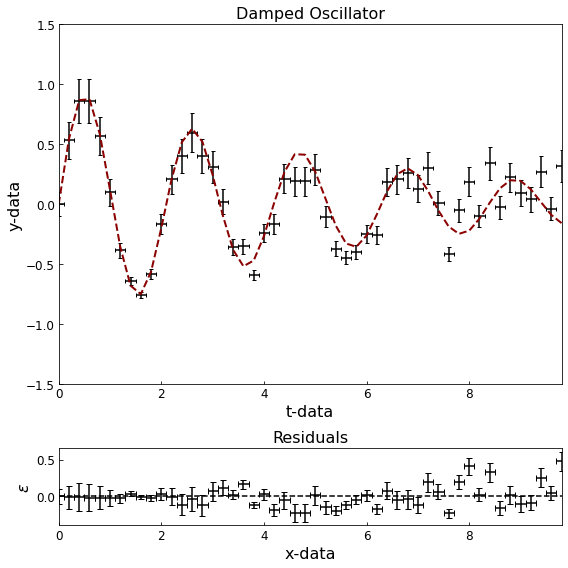

In [39]:
def model(t,a,b):
    return np.exp(-a*t)*np.sin(b*t)

def fit_result(t,y,xerr,yerr,model_name,p0):
    popt, pcov = curve_fit(model_name,t,y,sigma=yerr,absolute_sigma=True,p0=p0)
    for i in range(len(popt)):
        print('p{} = '.format(i+1), '{:.5f}'.format(popt[i]), '+-', '{:.5f}'.format(np.sqrt(pcov[i][i])))
        
    fig = plt.figure(figsize=(8,8))
    gs = gridspec.GridSpec(4, 4)
    axes_main = plt.subplot(gs[0:3, :4])
    axes_residuals = plt.subplot(gs[3, :4],sharex=axes_main)

    axes_main.tick_params(axis='both',direction ='in',labelsize=12)
    axes_main.set_title('Damped Oscillator',fontsize=16)    
    axes_main.errorbar(t,y,xerr=xerr,yerr=yerr,fmt='none',color='black',ecolor='black',capsize=2)
    axes_main.plot(t,model(t,*popt),color='darkred',ls='--', lw=2)
    axes_main.set_xlabel('t-data',fontsize=16)
    axes_main.set_ylabel('y-data',fontsize=16)
    axes_main.set_xlim(np.min(t),np.max(t))
    axes_main.set_ylim(-1.5,1.5)

    axes_residuals.tick_params(axis='both',direction ='in',labelsize=12)
    axes_residuals.set_title('Residuals',fontsize=16)
    axes_residuals.errorbar(t,y-model(t,*popt),xerr=xerr,yerr=yerr,fmt='none',color='black',ecolor='black',capsize=3)
    axes_residuals.hlines(0,np.min(t),np.max(t),color='black',ls='--')
    axes_residuals.set_xlabel('x-data',fontsize=16)
    axes_residuals.set_ylabel(r'$\epsilon$',fontsize=16)
    axes_residuals.set_xlim(np.min(t),np.max(t))
    # axes_residuals.set_ylim(-0.5,0.5)
    plt.tight_layout()
    plt.show()
    return
fit_result(t,y,terr,yerr,model,[-0.2,3])
fit_result(t,y,terr,yerr2,model,[-0.2,3])

  


NameError: name 'popt' is not defined

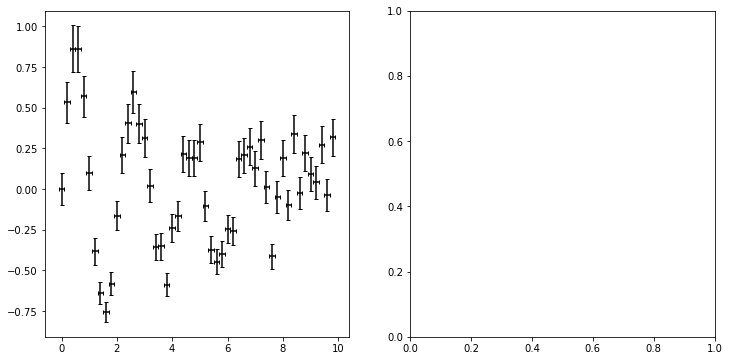

In [21]:
fig,axes=plt.subplots(1,2,figsize=(12,6))
axes[0].errorbar(t,y,xerr=xerr,yerr=yerr,fmt='none',color='black',ecolor='black',capsize=2)
axes[0].plot(t,model(t,*popt),color='darkred',ls='--', lw=2)
axes[0].set_xlabel('t-data',fontsize=16)
axes[0].set_ylabel('y-data',fontsize=16)
axes[0].set_xlim(0,10)
axes[0].set_ylim(-1.5,1.5)

axes[1].errorbar(x,y-model(x,*popt),xerr=xerr,yerr=yerr,fmt='none',color='black',ecolor='black',capsize=3)
axes[1].hlines(0,0,10,color='black',ls='--')
axes[1].set_xlabel('t-data',fontsize=16)
axes[1].set_ylabel('y-data',fontsize=16)
axes[1].set_xlim(0,10)
axes[1].set_ylim(-0.5,0.5)

plt.tight_layout()
plt.show()

In [ ]:
# xtra